In [1]:
# %% Importing
# System
import os
import sys

# Computing
import mne
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from surfer import Brain
from mayavi import mlab

__file__ = os.path.curdir
sys.path.append(os.path.join(os.path.dirname(__file__), '..', 'tools'))  # noqa
from MEG_worker import MEG_Worker
from visualizer import Visualizer
from inverse_solver import Inverse_Solver

In [2]:
mne.utils.get_config()

{'MNE_COREG_ADVANCED_RENDERING': 'true',
 'MNE_COREG_COPY_ANNOT': 'true',
 'MNE_COREG_GUESS_MRI_SUBJECT': 'false',
 'MNE_COREG_HEAD_HIGH_RES': 'true',
 'MNE_COREG_HEAD_OPACITY': '1.0',
 'MNE_COREG_INTERACTION': 'trackball',
 'MNE_COREG_MARK_INSIDE': 'false',
 'MNE_COREG_ORIENT_TO_SURFACE': 'false',
 'MNE_COREG_PREPARE_BEM': 'true',
 'MNE_COREG_PROJECT_EEG': 'false',
 'MNE_COREG_SCALE_BY_DISTANCE': 'false',
 'MNE_COREG_SCALE_LABELS': 'true',
 'MNE_COREG_SCENE_SCALE': '0.16',
 'MNE_COREG_SUBJECTS_DIR': '/home/zcc/documents/freesurfer/subjects',
 'MNE_COREG_WINDOW_HEIGHT': '798',
 'MNE_COREG_WINDOW_WIDTH': '1148',
 'MNE_DATASETS_SAMPLE_PATH': '/home/zcc/mne_data',
 'MNE_DATASETS_SPM_FACE_PATH': '/home/zcc/mne_data',
 'MNE_USE_CUDA': 'true',
 'SUBJECTS_DIR': '/nfs/diskstation/zccdata/freesurfer/subjects',
 'SUBJECT_DIR': '/nfs/diskstation/zccdata/freesurfer/subjects'}

In [3]:
try:
    src_fsaverage = mne.read_source_spaces('fsaverage_src.fif')
except:
    src_fsaverage = mne.setup_source_space('fsaverage', spacing='oct6', n_jobs=40)
    mne.write_source_spaces('src_fsaverage_src.fif', src)
src_fsaverage

    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read


<SourceSpaces: [<surface (lh), n_vertices=163842, n_used=4098>, <surface (rh), n_vertices=163842, n_used=4098>] MRI (surface RAS) coords, subject 'fsaverage'>

In [ ]:
# %%
# DO NOT RUN THIS UNLESS YOU WANT TO RECOMPUTE STC
stcs = dict()
stcs_baseline = dict()

spacing = [s['vertno'] for s in src_fsaverage]

for idx in range(1, 11):
    running_name = f'MEG_S{idx:02d}'
    band_name = 'U07'

    worker = MEG_Worker(running_name=running_name)
    worker.pipeline(band_name=band_name)

    # %%
    # epochs = worker.denoise_epochs['3']
    epochs = worker.clean_epochs
    epochs_baseline = worker.epochs['2']
    solver = Inverse_Solver(running_name=running_name)
    solver.pipeline(epochs=epochs,
                    raw_info=worker.raw.info)

    # %%
    stc, stc_fsaverage = solver.estimate(obj=epochs.average(), spacing=spacing)
    stc, stc_fsaverage_baseline = solver.estimate(obj=epochs_baseline.average(), spacing=spacing)
    
    stcs[running_name] = stc_fsaverage
    stcs_baseline[running_name] = stc_fsaverage_baseline
    
display(stcs)
display(stcs_baseline)

data = stc_fsaverage.data * 0
for running_name in stcs:
    data += stcs[running_name].data
stc_fsaverage.data = data / len(stcs)

data = stc_fsaverage_baseline.data * 0
for running_name in stcs_baseline:
    data += stcs_baseline[running_name].data
stc_fsaverage_baseline.data = data / len(stcs)

stc_fsaverage.save('stc_fsaverage')
stc_fsaverage_baseline.save('stc_fsaverage_baseline')

In [4]:
# %%
mne.viz.set_3d_backend('pyvista')

label_list_aparc = mne.read_labels_from_annot('fsaverage', 'aparc', 'both')
label_list_visuotopic = mne.read_labels_from_annot('fsaverage', 'PALS_B12_Visuotopic', 'both')

display(label_list_aparc)
display(label_list_visuotopic)

labels = dict()

for j, label in enumerate(label_list_visuotopic):
    if label.name.startswith('Visuotopic'):
        labels[label.name] = label
        
ROIs = ['fusiform',
        'temporal',
       ]
for j, label in enumerate(label_list_aparc):
    labels[label.name] = label
        

Using pyvista 3d backend.

Reading labels from parcellation...
   read 35 labels from /nfs/diskstation/zccdata/freesurfer/subjects/fsaverage/label/lh.aparc.annot
   read 34 labels from /nfs/diskstation/zccdata/freesurfer/subjects/fsaverage/label/rh.aparc.annot
Reading labels from parcellation...
   read 16 labels from /nfs/diskstation/zccdata/freesurfer/subjects/fsaverage/label/lh.PALS_B12_Visuotopic.annot
   read 27 labels from /nfs/diskstation/zccdata/freesurfer/subjects/fsaverage/label/rh.PALS_B12_Visuotopic.annot


[<Label  |  fsaverage, 'bankssts-lh', lh : 2137 vertices>,
 <Label  |  fsaverage, 'bankssts-rh', rh : 2196 vertices>,
 <Label  |  fsaverage, 'caudalanteriorcingulate-lh', lh : 1439 vertices>,
 <Label  |  fsaverage, 'caudalanteriorcingulate-rh', rh : 1608 vertices>,
 <Label  |  fsaverage, 'caudalmiddlefrontal-lh', lh : 3736 vertices>,
 <Label  |  fsaverage, 'caudalmiddlefrontal-rh', rh : 3494 vertices>,
 <Label  |  fsaverage, 'cuneus-lh', lh : 1630 vertices>,
 <Label  |  fsaverage, 'cuneus-rh', rh : 1638 vertices>,
 <Label  |  fsaverage, 'entorhinal-lh', lh : 1102 vertices>,
 <Label  |  fsaverage, 'entorhinal-rh', rh : 902 vertices>,
 <Label  |  fsaverage, 'frontalpole-lh', lh : 272 vertices>,
 <Label  |  fsaverage, 'frontalpole-rh', rh : 369 vertices>,
 <Label  |  fsaverage, 'fusiform-lh', lh : 4714 vertices>,
 <Label  |  fsaverage, 'fusiform-rh', rh : 4661 vertices>,
 <Label  |  fsaverage, 'inferiorparietal-lh', lh : 7871 vertices>,
 <Label  |  fsaverage, 'inferiorparietal-rh', rh : 9

[<Label  |  fsaverage, '???-lh', lh : 116427 vertices>,
 <Label  |  fsaverage, '???-rh', rh : 117864 vertices>,
 <Label  |  fsaverage, '????-rh', rh : 117864 vertices>,
 <Label  |  fsaverage, '???????-rh', rh : 117864 vertices>,
 <Label  |  fsaverage, 'AUDITORY-lh', lh : 930 vertices>,
 <Label  |  fsaverage, 'AUDITORY-rh', rh : 955 vertices>,
 <Label  |  fsaverage, 'GYRUS-rh', rh : 117864 vertices>,
 <Label  |  fsaverage, 'LANDMARK.MT-rh', rh : 955 vertices>,
 <Label  |  fsaverage, 'LANDMARK.V2d-rh', rh : 1867 vertices>,
 <Label  |  fsaverage, 'LANDMARK.V2v-rh', rh : 1867 vertices>,
 <Label  |  fsaverage, 'MEDIAL.WALL-lh', lh : 11608 vertices>,
 <Label  |  fsaverage, 'MEDIAL.WALL-rh', rh : 11312 vertices>,
 <Label  |  fsaverage, 'NonVisuotopic-lh', lh : 22715 vertices>,
 <Label  |  fsaverage, 'NonVisuotopic-rh', rh : 21697 vertices>,
 <Label  |  fsaverage, 'SUL.HF-rh', rh : 955 vertices>,
 <Label  |  fsaverage, 'SUL.ISS-rh', rh : 955 vertices>,
 <Label  |  fsaverage, 'Thresh_Normal_dee

In [5]:
# DO NOT RUN THIS,
# IT IS VERY SLOW
if False:
    brain = Brain(subject_id='fsaverage',
                  hemi='split',
                  surf='inflated',
                  cortex='low_contrast',
                  background='white',
                  size=(800, 600))
    # brain.add_annotation('aparc')
    # brain.add_annotation(label_name)
    for name in labels:
        print(name)
        brain.add_label(labels[name], borders=True)
    print('Done.')

    mlab.show()

In [6]:
stc_fsaverage = mne.read_source_estimate('stc_fsaverage')
stc_fsaverage_baseline = mne.read_source_estimate('stc_fsaverage_baseline')

stc = stc_fsaverage_baseline
stc.data = stc_fsaverage.data - stc_fsaverage_baseline.data
stc

<SourceEstimate  |  8196 vertices, tmin : -200.0 (ms), tmax : 1200.0000000000002 (ms), tstep : 10.0 (ms), data shape : (8196, 141)>

In [7]:
alldata = sorted(stc.data.ravel(), reverse=True)
n = len(alldata)
LIMS = [alldata[int(n * r)] for r in [0.05, 0.01, 0.005, 0]]
LIMS

[33.12834, 41.526474, 44.588142, 62.922222]

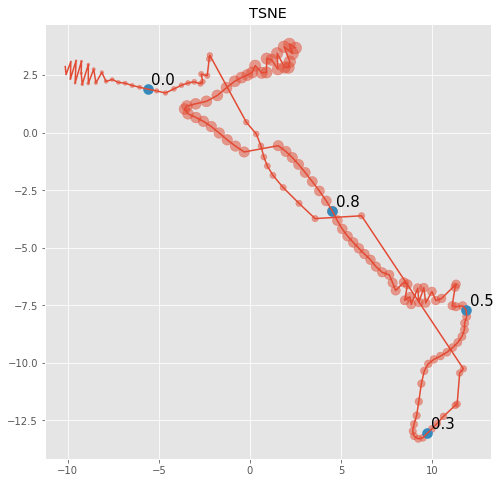

In [8]:
lims = LIMS[1:]

from sklearn.manifold import TSNE

data = stc.data
large_data = data[np.max(data, axis=1) > lims[0]]
large_data.shape, data.shape

tsne = TSNE(n_components=2, n_jobs=40)
proj_data = tsne.fit_transform(data.transpose())

plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.scatter(proj_data[:, 0], proj_data[:, 1], range(141), alpha=0.5)
ax.plot(proj_data[:, 0], proj_data[:, 1])

idxs = []
for t in [0.0, 0.3, 0.5, 0.8]:
    idx = np.where(t == stc.times)[0][0]
    ax.text(proj_data[idx, 0]+0.2, proj_data[idx, 1]+0.2, t, fontdict=dict(size=15))
    idxs.append(idx)
    
ax.scatter(proj_data[idxs, 0], proj_data[idxs, 1], 100)
ax.set_title('TSNE')

fig.savefig('TSNE.png')

In [9]:
ts = mne.extract_label_time_course(stc, label_list_aparc, src_fsaverage, mode='mean_flip', allow_empty=True, return_generator=True)
ts.shape

Extracting time courses for 69 labels (mode: mean_flip)


<ipython-input-9-34ad0a17b39a>:1: RuntimeWarning: source space does not contain any vertices for label unknown-lh. Assigning all-zero time series to label.
  ts = mne.extract_label_time_course(stc, label_list_aparc, src_fsaverage, mode='mean_flip', allow_empty=True, return_generator=True)


(69, 141)

In [10]:
con, freqs, times, n_epochs, n_tapers = mne.connectivity.spectral_connectivity(
    ts, method='pli', mode='multitaper', sfreq=stc.sfreq, fmin=0.1, fmax=7, faverage=True, mt_adaptive=True, n_jobs=32)

Connectivity computation...


ValueError: not enough values to unpack (expected 2, got 1)

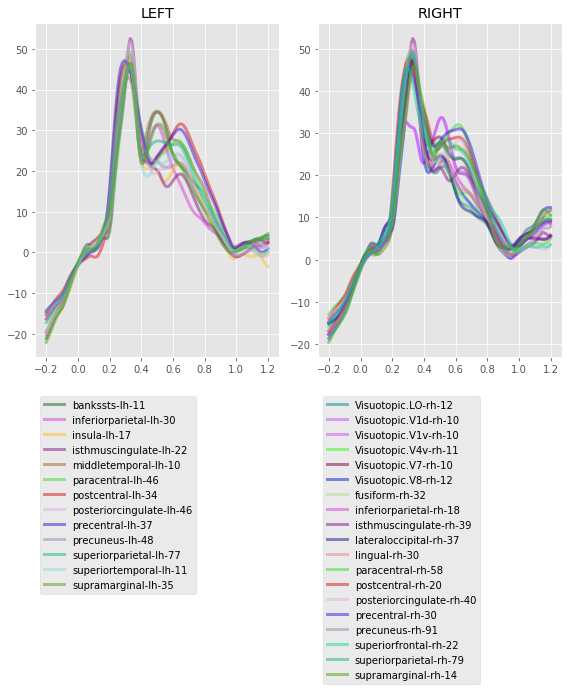

In [11]:
lims = LIMS[1:]

plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, figsize=(8, 10))

times = stc.times
select_labels = dict()
for name in labels:
    label = labels[name]
    color = label.color
    try:
        stc_inlabel = stc.in_label(label)
    except ValueError:
        continue
    data = stc_inlabel.data
    data = data[np.max(data, axis=1) > lims[1]]
    if len(data) < 10:
        continue
    # print(name, color, data.shape)
    
#     sort = sorted(data.ravel(), reverse=True)
#     if sort[1000] < lims[0]:
#         continue
    
    mean_data = np.mean(data, axis=0)
    
    if name.endswith('-lh'):
        ax = axes[0]
    else:
        ax = axes[1]
        
    ax.plot(times, mean_data, c=color, label=f'{name}-{len(data)}', alpha=0.5, linewidth=3)
    
    select_labels[name] = label

for j in [0, 1]:
    axes[j].legend(loc='upper left', bbox_to_anchor=(0, -0.1))
    
axes[0].set_title('LEFT')
axes[1].set_title('RIGHT')

fig.tight_layout()
fig.savefig('WaveForm.png')

In [12]:
lims = LIMS[1:]
mne.viz.set_3d_backend('pyvista')
views = ['lat']
clim = dict(kind='value', lims=lims)
surfer_kwargs = dict(hemi='both',
                     clim=clim,
                     views=views,
                     initial_time=0.3,
                     time_unit='s',
                     size=(800, 800),
                     smoothing_steps=10,
                     time_viewer=True,
                     subject='fsaverage')

# This can not be operated using VS code
brain = stc.plot(**surfer_kwargs)

for name in select_labels:
    print(name)
    brain.add_label(labels[name], borders=True)

# mlab.show()

Visuotopic.LO-rh
Visuotopic.V1d-rh
Visuotopic.V1v-rh
Visuotopic.V4v-rh
Visuotopic.V7-rh
Visuotopic.V8-rh
bankssts-lh
fusiform-rh
inferiorparietal-lh
inferiorparietal-rh
insula-lh
isthmuscingulate-lh
isthmuscingulate-rh
lateraloccipital-rh
lingual-rh
middletemporal-lh
paracentral-lh
paracentral-rh
postcentral-lh
postcentral-rh
posteriorcingulate-lh
posteriorcingulate-rh
precentral-lh
precentral-rh
precuneus-lh
precuneus-rh
superiorfrontal-rh
superiorparietal-lh
superiorparietal-rh
superiortemporal-lh
supramarginal-lh
supramarginal-rh


In [ ]:
lims = LIMS[:3]
mne.viz.set_3d_backend('pyvista')
views = ['lat', 'med', 'cau', 'dor', 'ven']
clim = dict(kind='value', lims=lims)
surfer_kwargs = dict(hemi='both',
                     clim=clim,
                     views=views,
                     initial_time=0.5,
                     time_unit='s',
                     size=(800, 800),
                     smoothing_steps=10,
                     time_viewer=False,
                     subject='fsaverage')

# This can not be operated using VS code
brain = stc.plot(**surfer_kwargs)

# for name in select_labels:
#     print(name)
#     brain.add_label(labels[name], borders=True)

# mlab.show()